Reference:
- Data source
    <http://insideairbnb.com/get-the-data.html>
- Learn plugin search
    <https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/plugin-Search.ipynb>
- Learn colormap
    <https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Colormaps.ipynb>

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import datetime
import geopandas
import branca
import folium


# Import datasets

In [2]:
listing_summary_190709 = pd.read_csv('datasets/20190709/20190709_listings_summary.csv', parse_dates=['last_review'])
listing_details_190709 = pd.read_csv('datasets/20190709/20190709_listings_details.csv')

listing_summary_190605 = pd.read_csv('datasets/listings_summary_history/20190605_listings_summary.csv', parse_dates=['last_review'])
listing_summary_190507 = pd.read_csv('datasets/listings_summary_history/20190507_listings_summary.csv', parse_dates=['last_review'])
listing_summary_190409 = pd.read_csv('datasets/listings_summary_history/20190409_listings_summary.csv', parse_dates=['last_review'])
listing_summary_190311 = pd.read_csv('datasets/listings_summary_history/20190311_listings_summary.csv', parse_dates=['last_review'])
listing_summary_190205 = pd.read_csv('datasets/listings_summary_history/20190205_listings_summary.csv', parse_dates=['last_review'])
listing_summary_190113 = pd.read_csv('datasets/listings_summary_history/20190113_listings_summary.csv', parse_dates=['last_review'])

listing_summary_181207 = pd.read_csv('datasets/listings_summary_history/20181207_listings_summary.csv', parse_dates=['last_review'])
listing_summary_181106 = pd.read_csv('datasets/listings_summary_history/20181106_listings_summary.csv', parse_dates=['last_review'])
listing_summary_181009 = pd.read_csv('datasets/listings_summary_history/20181009_listings_summary.csv', parse_dates=['last_review'])
listing_summary_180910 = pd.read_csv('datasets/listings_summary_history/20180910_listings_summary.csv', parse_dates=['last_review'])
listing_summary_180813 = pd.read_csv('datasets/listings_summary_history/20180813_listings_summary.csv', parse_dates=['last_review'])
listing_summary_180708 = pd.read_csv('datasets/listings_summary_history/20180708_listings_summary.csv', parse_dates=['last_review'])
listing_summary_180607 = pd.read_csv('datasets/listings_summary_history/20180607_listings_summary.csv', parse_dates=['last_review'])
listing_summary_180511 = pd.read_csv('datasets/listings_summary_history/20180511_listings_summary.csv', parse_dates=['last_review'])
listing_summary_180410 = pd.read_csv('datasets/listings_summary_history/20180410_listings_summary.csv', parse_dates=['last_review'])
listing_summary_180306 = pd.read_csv('datasets/listings_summary_history/20180306_listings_summary.csv', parse_dates=['last_review'])
listing_summary_180205 = pd.read_csv('datasets/listings_summary_history/20180205_listings_summary.csv', parse_dates=['last_review'])
listing_summary_180115 = pd.read_csv('datasets/listings_summary_history/20180115_listings_summary.csv', parse_dates=['last_review'])

listing_summary_171207 = pd.read_csv('datasets/listings_summary_history/20171207_listings_summary.csv', parse_dates=['last_review'])
listing_summary_171108 = pd.read_csv('datasets/listings_summary_history/20171108_listings_summary.csv', parse_dates=['last_review'])
listing_summary_171005 = pd.read_csv('datasets/listings_summary_history/20171005_listings_summary.csv', parse_dates=['last_review'])
listing_summary_170906 = pd.read_csv('datasets/listings_summary_history/20170906_listings_summary.csv', parse_dates=['last_review'])
listing_summary_170805 = pd.read_csv('datasets/listings_summary_history/20170805_listings_summary.csv', parse_dates=['last_review'])
listing_summary_170705 = pd.read_csv('datasets/listings_summary_history/20170705_listings_summary.csv', parse_dates=['last_review'])
listing_summary_170604 = pd.read_csv('datasets/listings_summary_history/20170604_listings_summary.csv', parse_dates=['last_review'])
listing_summary_170505 = pd.read_csv('datasets/listings_summary_history/20170505_listings_summary.csv', parse_dates=['last_review'])
listing_summary_170404 = pd.read_csv('datasets/listings_summary_history/20170404_listings_summary.csv', parse_dates=['last_review'])
listing_summary_170304 = pd.read_csv('datasets/listings_summary_history/20170304_listings_summary.csv', parse_dates=['last_review'])
listing_summary_170206 = pd.read_csv('datasets/listings_summary_history/20170206_listings_summary.csv', parse_dates=['last_review'])
listing_summary_170103 = pd.read_csv('datasets/listings_summary_history/20170103_listings_summary.csv', parse_dates=['last_review'])

listing_summary_161205 = pd.read_csv('datasets/listings_summary_history/20161205_listings_summary.csv', parse_dates=['last_review'])
listing_summary_161104 = pd.read_csv('datasets/listings_summary_history/20161104_listings_summary.csv', parse_dates=['last_review'])
listing_summary_160903 = pd.read_csv('datasets/listings_summary_history/20160903_listings_summary.csv', parse_dates=['last_review'])
listing_summary_160804 = pd.read_csv('datasets/listings_summary_history/20160804_listings_summary.csv', parse_dates=['last_review'])
listing_summary_160703 = pd.read_csv('datasets/listings_summary_history/20160703_listings_summary.csv', parse_dates=['last_review'])
listing_summary_160602 = pd.read_csv('datasets/listings_summary_history/20160602_listings_summary.csv', parse_dates=['last_review'])
listing_summary_160502 = pd.read_csv('datasets/listings_summary_history/20160502_listings_summary.csv', parse_dates=['last_review'])
listing_summary_160403 = pd.read_csv('datasets/listings_summary_history/20160403_listings_summary.csv', parse_dates=['last_review'])
listing_summary_160202 = pd.read_csv('datasets/listings_summary_history/20160202_listings_summary.csv', parse_dates=['last_review'])
listing_summary_160102 = pd.read_csv('datasets/listings_summary_history/20160102_listings_summary.csv', parse_dates=['last_review'])

listing_summary_151106 = pd.read_csv('datasets/listings_summary_history/20151106_listings_summary.csv', parse_dates=['last_review'])
listing_summary_150902 = pd.read_csv('datasets/listings_summary_history/20150902_listings_summary.csv', parse_dates=['last_review'])
listing_summary_150506 = pd.read_csv('datasets/listings_summary_history/20150506_listings_summary.csv', parse_dates=['last_review'])


/usr/local/Cellar/ipython/7.5.0/libexec/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
nbh_geo_190709 = geopandas.read_file('datasets/20190709/20190709_neighbourhoods.geojson',
                                     driver='GeoJSON')

In [4]:
listing_summary_190709 = listing_summary_190709.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_details_190709 = listing_details_190709[['id', 'host_since', 'host_location',
                                                 'zipcode', 'smart_location', 'accommodates',
                                                 'bathrooms', 'beds', 'bed_type', 'review_scores_rating']]
listing_details_190709.host_since = pd.to_datetime(listing_details_190709.host_since, format='%Y-%m-%d')

In [5]:
listing_summary_190605 = listing_summary_190605.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_190507 = listing_summary_190507.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_190409 = listing_summary_190409.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_190311 = listing_summary_190311.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_190205 = listing_summary_190205.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_190113 = listing_summary_190113.drop(columns=['name', 'neighbourhood_group', 'last_review'])

listing_summary_181207 = listing_summary_181207.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_181106 = listing_summary_181106.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_181009 = listing_summary_181009.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_180910 = listing_summary_180910.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_180813 = listing_summary_180813.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_180708 = listing_summary_180708.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_180607 = listing_summary_180607.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_180511 = listing_summary_180511.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_180410 = listing_summary_180410.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_180306 = listing_summary_180306.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_180205 = listing_summary_180205.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_180115 = listing_summary_180115.drop(columns=['name', 'neighbourhood_group', 'last_review'])

listing_summary_171207 = listing_summary_171207.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_171108 = listing_summary_171108.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_171005 = listing_summary_171005.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_170906 = listing_summary_170906.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_170805 = listing_summary_170805.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_170705 = listing_summary_170705.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_170604 = listing_summary_170604.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_170505 = listing_summary_170505.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_170404 = listing_summary_170404.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_170304 = listing_summary_170304.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_170206 = listing_summary_170206.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_170103 = listing_summary_170103.drop(columns=['name', 'neighbourhood_group', 'last_review'])

listing_summary_161205 = listing_summary_161205.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_161104 = listing_summary_161104.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_160903 = listing_summary_160903.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_160804 = listing_summary_160804.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_160703 = listing_summary_160703.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_160602 = listing_summary_160602.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_160502 = listing_summary_160502.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_160403 = listing_summary_160403.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_160202 = listing_summary_160202.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_160102 = listing_summary_160102.drop(columns=['name', 'neighbourhood_group', 'last_review'])

listing_summary_151106 = listing_summary_151106.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_150902 = listing_summary_150902.drop(columns=['name', 'neighbourhood_group', 'last_review'])
listing_summary_150506 = listing_summary_150506.drop(columns=['name', 'neighbourhood_group', 'last_review'])


In [6]:
listing_190709 = pd.merge(listing_summary_190709, listing_details_190709, on='id')
listing_190709 = listing_190709[['id',
                                 'host_id',
                                 'host_name',
                                 'host_since',
                                 'host_location',
                                 'neighbourhood',
                                 'latitude',
                                 'longitude',
                                 'zipcode',
                                 'smart_location',
                                 'room_type',
                                 'accommodates',
                                 'bed_type',
                                 'review_scores_rating',
                                 'price',
                                 'minimum_nights',
                                 'number_of_reviews',
                                 'reviews_per_month',
                                 'calculated_host_listings_count',
                                 'availability_365']]

In [7]:
listing_190709.head(3)

,id,host_id,host_name,host_since,host_location,neighbourhood,latitude,longitude,zipcode,smart_location,room_type,accommodates,bed_type,review_scores_rating,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,3109,3631,Anne,2008-10-14,"Paris, Île-de-France, France",Observatoire,48.83349,2.31852,75014,"Paris, France",Entire home/apt,2,Real Bed,100.0,60,3,8,0.26,1,227
1,5396,7903,Borzou,2009-02-14,"Istanbul, İstanbul, Turkey",Hôtel-de-Ville,48.85100,2.35869,75004,"Paris, France",Entire home/apt,2,Pull-out Sofa,91.0,115,1,180,1.47,1,27
2,7397,2626,Franck,2008-08-30,"Paris, Île-de-France, France",Hôtel-de-Ville,48.85758,2.35275,75004,"Paris, France",Entire home/apt,4,Real Bed,94.0,115,10,248,2.47,1,240


# Data description

In [8]:
listing_190709.describe().T

,count,mean,std,min,25%,50%,75%,max
id,64293.0,1.934634e+07,1.116680e+07,3109.00000,9.186615e+06,1.968928e+07,2.950201e+07,3.656124e+07
host_id,64293.0,6.648611e+07,7.693518e+07,2419.00000,1.080773e+07,3.266216e+07,9.359166e+07,2.748233e+08
latitude,64293.0,4.886411e+01,1.848269e-02,48.81289,4.885067e+01,4.886526e+01,4.887923e+01,4.890521e+01
longitude,64293.0,2.345350e+00,3.377633e-02,2.21943,2.323950e+00,2.348330e+00,2.370900e+00,2.471890e+00
accommodates,64293.0,3.054516e+00,1.549560e+00,1.00000,2.000000e+00,2.000000e+00,4.000000e+00,1.700000e+01
review_scores_rating,48536.0,9.297194e+01,8.307887e+00,20.00000,9.000000e+01,9.500000e+01,9.900000e+01,1.000000e+02
price,64293.0,1.167639e+02,1.643167e+02,0.00000,6.000000e+01,8.000000e+01,1.200000e+02,9.379000e+03
minimum_nights,64293.0,5.529342e+00,4.787406e+01,1.00000,2.000000e+00,2.000000e+00,4.000000e+00,9.999000e+03
number_of_reviews,64293.0,1.874920e+01,3.875126e+01,0.00000,1.000000e+00,5.000000e+00,1.900000e+01,8.090000e+02
reviews_per_month,49684.0,1.210193e+00,1.459079e+00,0.01000,2.300000e-01,7.000000e-01,1.640000e+00,3.115000e+01


In [9]:
listing_190709.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64293 entries, 0 to 64292
Data columns (total 20 columns):
id                                64293 non-null int64
host_id                           64293 non-null int64
host_name                         64229 non-null object
host_since                        64229 non-null datetime64[ns]
host_location                     64059 non-null object
neighbourhood                     64293 non-null object
latitude                          64293 non-null float64
longitude                         64293 non-null float64
zipcode                           63593 non-null object
smart_location                    64293 non-null object
room_type                         64293 non-null object
accommodates                      64293 non-null int64
bed_type                          64293 non-null object
review_scores_rating              48536 non-null float64
price                             64293 non-null int64
minimum_nights                    64293 non-

# Data cleaning

In [10]:
listing_190709.fillna(0, inplace=True)

listing_190709['id'] = listing_190709['id'].astype(str)
listing_190709['host_id'] = listing_190709['host_id'].astype(str)

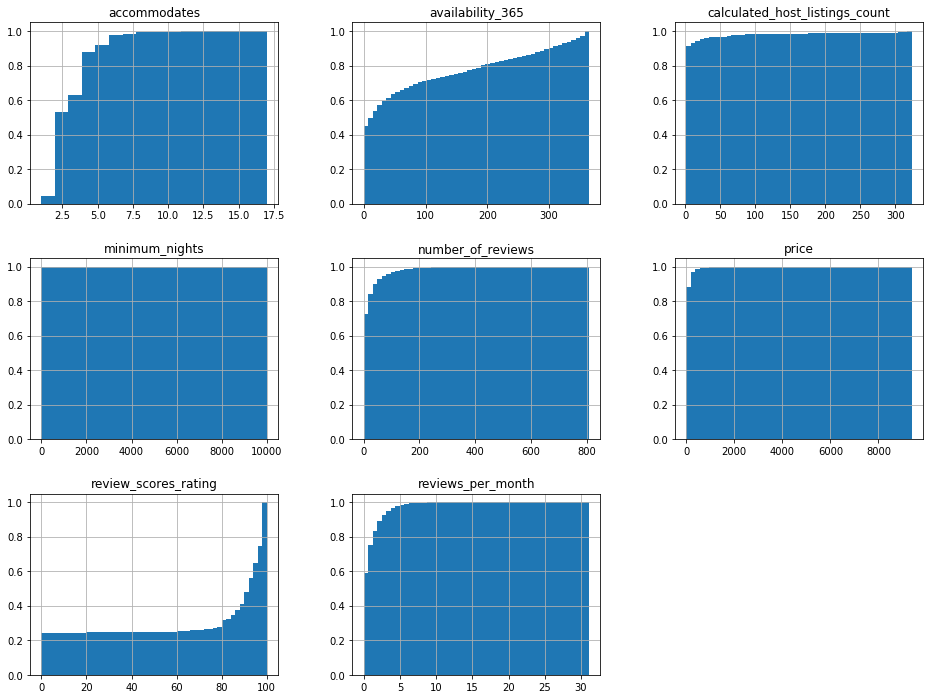

In [11]:
listing_190709.drop(columns=['latitude', 'longitude']).hist(bins=50, figsize=(16, 12),
                                                            cumulative=True, density=True)
plt.show()

According to the histograms above, we find that in Paris 50% locations are able to accommodate at least 2 persons, the review scores rating is 100/100 for 18% locations, nearly 50% locations need clients to reserve at least 2 nights. Moreover, the most important point, the price of one night is less than $80 for 50% locations.

# Analysis on data of 09/07/2019

## What type of room are they?

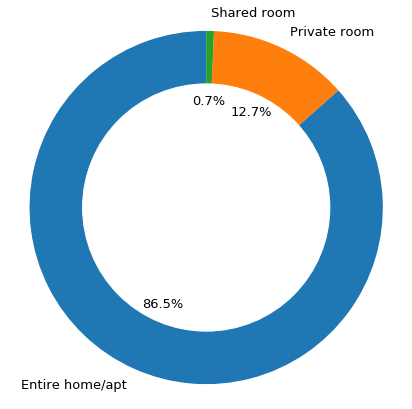

In [12]:
plt.figure(figsize=(7, 7))

my_circle = plt.Circle((0, 0), 0.7, color='white')

d = plt.pie(listing_190709.groupby(['room_type'])['id'].nunique().reset_index().id,
            labels=listing_190709.room_type.unique(),
            autopct='%1.1f%%',
            startangle=90,
            labeldistance=1.1)
plt.axis('equal')
plt.gca().add_artist(my_circle)

for i, (a, b, c) in enumerate(d):
    if i > 0:
        a.set_fontsize(13)
        b.set_fontsize(13)
        c.set_fontsize(13)

In Paris, 86.5% of Airbnb locations are entire home/appartment, nearly 13% are private room, the rest are shared room.

## How many rooms/locations does one host have?

In [13]:
listing_190709.groupby('host_id')['id'].nunique().reset_index().describe(percentiles=(0.75, 0.94))

,id
count,53706.000000
mean,1.197129
std,2.814542
min,1.000000
50%,1.000000
75%,1.000000
94%,2.000000
max,323.000000


According to the codes above, we get that 7% hosts rent more than one location, which is equivalent of nearly 3800 hosts.

## What are the neighbourhood of locations?

In [14]:
nbh_count_190709 = listing_190709.groupby('neighbourhood')['id'].nunique().reset_index()
nbh_count_190709.rename(columns={'id':'nb'}, inplace=True)
nbh_geo_count_190709 = pd.merge(nbh_geo_190709, nbh_count_190709, on='neighbourhood')
nbh_geo_count_190709['QP'] = nbh_geo_count_190709['nb'] / nbh_geo_count_190709['nb'].sum()
nbh_geo_count_190709['QP_str'] = nbh_geo_count_190709['QP'].apply(lambda x : str(round(x*100, 1)) + '%')

nbh_count_190709_dict = nbh_count_190709.set_index('neighbourhood')['nb']

In [15]:
nbh_count_colormap_190709 = branca.colormap.linear.OrRd_09.scale(min(nbh_count_190709['nb']),
                                                                 max(nbh_count_190709['nb']))

In [16]:
nbh_locs_190709_map = folium.Map(location=[48.856614, 2.3522219], zoom_start = 12, tiles='cartodbpositron')

style_function = lambda x: {
    'fillColor': nbh_count_colormap_190709(x['properties']['nb']),
    'color': 'white',
    'weight': 1,
    'fillOpacity': 0.7
}


nbh_locsNb_190709 = folium.GeoJson(
    nbh_geo_count_190709,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['neighbourhood', 'nb', 'QP_str'],
        aliases=['Neighbourhood', 'Location amount', 'Quote-part'],
        localize=True
    )
).add_to(nbh_locs_190709_map)


nbh_count_colormap_190709.add_to(nbh_locs_190709_map)
nbh_count_colormap_190709.caption = 'Airbnb location amount'
nbh_count_colormap_190709.add_to(nbh_locs_190709_map)

In [17]:
nbh_locs_190709_map

The top 3 neighbourhood are Buttes-Montmartre (11.3%), Popincourt (9.8%) and Vaugirard (7.4%), the flop 3 neighbourhood are Louvre, Elysée and Palais-Bourbon, which might because the real estate is much more expensive in these quarters, and there are less appartment to be sold, people who purchase real estate for renting is less than other quarters.

In [ ]:
# nbh_locs_190709_map.save('neighbourhood_locations_190709.html')

## Average price for each room type in each neighbourhood ?

In [18]:
nbh_type_avg_price_190709 = listing_190709.groupby(['room_type', 'neighbourhood'])['price'].mean().reset_index()
nbh_type_avg_price_190709 = nbh_type_avg_price_190709.rename(columns={'price':'avg_price'})
nbh_type_avg_price_190709 = nbh_type_avg_price_190709.sort_values('avg_price', ascending=False).reset_index(drop=True)

In [19]:
pr_nbh_avg_price_190709 = nbh_type_avg_price_190709[nbh_type_avg_price_190709['room_type']=='Private room'].reset_index(drop=True)
ea_nbh_avg_price_190709 = nbh_type_avg_price_190709[nbh_type_avg_price_190709['room_type']=='Entire home/apt'].reset_index(drop=True)
sr_nbh_avg_price_190709 = nbh_type_avg_price_190709[nbh_type_avg_price_190709['room_type']=='Shared room'].reset_index(drop=True)

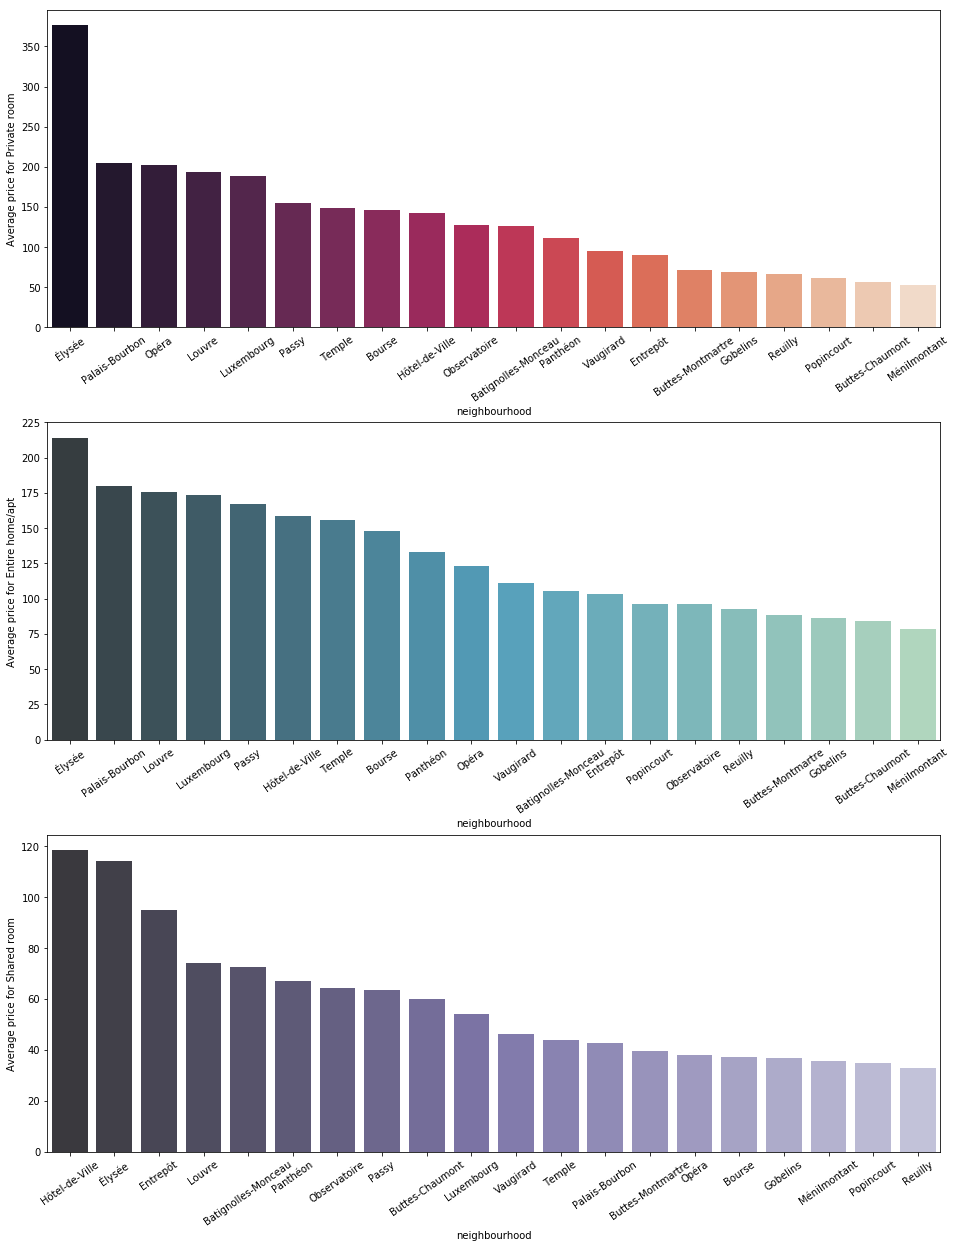

In [20]:
fig, axarr = plt.subplots(nrows=3, ncols=1, figsize=(16, 21))

sns.barplot(x=pr_nbh_avg_price_190709['neighbourhood'], y=pr_nbh_avg_price_190709['avg_price'],
            palette='rocket', ax=axarr[0])
axarr[0].tick_params(axis='x', rotation = 35)
axarr[0].set_ylabel('Average price for Private room')

sns.barplot(x=ea_nbh_avg_price_190709['neighbourhood'], y=ea_nbh_avg_price_190709['avg_price'],
            palette='GnBu_d', ax=axarr[1])
axarr[1].tick_params(axis='x', rotation = 35)
axarr[1].set_ylabel('Average price for Entire home/apt')

sns.barplot(x=sr_nbh_avg_price_190709['neighbourhood'], y=sr_nbh_avg_price_190709['avg_price'],
            palette='Purples_d', ax=axarr[2])
axarr[2].tick_params(axis='x', rotation = 35)
axarr[2].set_ylabel('Average price for Shared room')

plt.subplots_adjust(hspace=0.3)

It's a pitty that we don't know the area for each location, we cannot calculate the price for each m2. However, we the average price for each room type in different neighbourhood.

Overall, the "Private room" and the "Entire home/apt" in Elysée is the most expensive, the "Shared room" in this neighbourhood is just a little bit cheaper than the ones in Hôtel-de-Ville. Moreover, the "Private room" and the "Entire home/apt" in Ménilmontant is the much cheaper than other neighbourhoods, the "Shared room" in this neighbourhood is just a little bit more expensive than the ones in Popincourt and Reuilly.

## How many guests do different room types accommodate?

In [21]:
room_type_acmNb_190709 = pd.pivot_table(data=listing_190709,
                                        index='accommodates',
                                        columns='room_type',
                                        values='id',
                                        aggfunc='count',
                                        fill_value=0).reset_index()


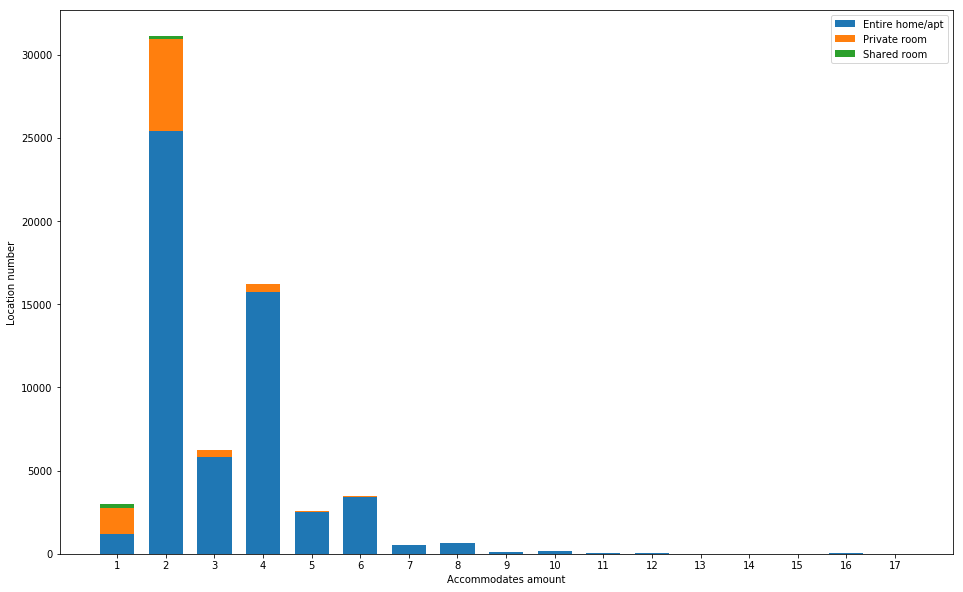

In [22]:
plt.figure(figsize=(16, 10))

rect1 = plt.bar(room_type_acmNb_190709['accommodates'],
                room_type_acmNb_190709['Entire home/apt'],
                width=0.7)

rect2 = plt.bar(room_type_acmNb_190709['accommodates'],
                room_type_acmNb_190709['Private room'],
                bottom=room_type_acmNb_190709['Entire home/apt'],
                width=0.7)

rect3 = plt.bar(room_type_acmNb_190709['accommodates'],
                room_type_acmNb_190709['Shared room'],
                bottom=room_type_acmNb_190709['Entire home/apt'] + room_type_acmNb_190709['Private room'],
                width=0.7)

plt.xticks(room_type_acmNb_190709['accommodates'], room_type_acmNb_190709['accommodates'])
plt.xlabel('Accommodates amount')
plt.ylabel('Location number')
plt.legend((rect1[0], rect2[0], rect3[0]), ('Entire home/apt', 'Private room', 'Shared room'))


According to this graph, the majority of location is able to accommodate 2 or 4 people, most of locations are "Entire home/apt". If you are one or two people, you might also find a "Private room" instead of an "Entire home/apt". Overall, almost locations are "Entire home/apt".

## Seniority of hosts

In [23]:
def calculate_hosts_seniority(this_year, start_date):
    if type(start_date) == int:
        return '0 year'
    else:
        seniority = this_year - start_date.year
        if seniority < 2:
            return str(seniority) + ' year'
        elif 2 <= seniority < 8:
            return str(seniority) + ' years'
        else:
            return '>= 8 years'

In [24]:
now = datetime.datetime.now()
listing_190709['host_seniority'] = listing_190709['host_since'].apply(lambda x: calculate_hosts_seniority(now.year, x))

In [25]:
host_seniority_190709 = listing_190709.groupby('host_seniority')['host_id'].nunique().reset_index()

host_seniority_190709.rename(columns={'host_id':'nb'}, inplace=True)
host_seniority_190709['QP'] = host_seniority_190709['nb'] / host_seniority_190709['nb'].sum()
host_seniority_190709['labels'] = host_seniority_190709.apply(
    lambda row: '%s\n%d locations\n(%.1f%%)' % (row['host_seniority'], row['nb'], row['QP']*100),
    axis=1)
host_seniority_190709.sort_values('QP', ascending=False, inplace=True)

(0.0, 100.0, 0.0, 100.0)

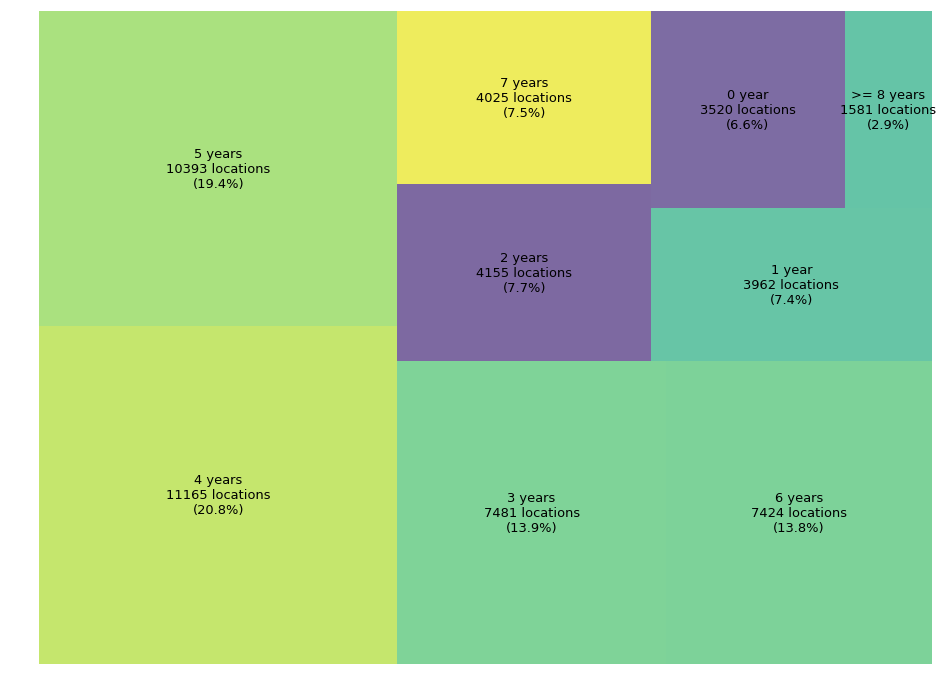

In [26]:
plt.figure(figsize=(16, 12))

plt.rc('font', size=13)
squarify.plot(sizes=host_seniority_190709.nb,
              label=host_seniority_190709.labels,
              alpha=0.7)
plt.axis('off')

Almost 40% of hosts have joined into Airbnb since 4 or 5 years, about 3% of hosts are regular hosts who have joined Airbnb since at least 8 years.

## Locations on the map

In [27]:
from shapely.geometry import Point, shape 
import geopandas as gpd
import folium

locs_190709_geometry = [Point(xy) for xy in zip(listing_190709.longitude, listing_190709.latitude)]
crs = {'init': 'epsg:4326'} # Coordinate Reference Systems, "epsg:4326" is a common projection of WGS84 Latitude/Longitude
locs_190709_gdf = gpd.GeoDataFrame(listing_190709, crs=crs, geometry=locs_190709_geometry)


In [28]:
from folium import plugins
locs_190709_map = folium.Map(location=[48.856614, 2.3522219], zoom_start = 13, tiles='cartodbpositron')

feature_ea = folium.FeatureGroup(name='Entire home/apt')
feature_pr = folium.FeatureGroup(name='Private room')
feature_sr = folium.FeatureGroup(name='Shared room')

for i, v in locs_190709_gdf.iterrows():
    popup = """
    Location id : <b>%s</b><br>
    Host name : <b>%s</b><br>
    Room type : <b>%s</b><br>
    Neighbourhood : <b>%s</b><br>
    Price : <b>%d</b><br>
    Minimum nights : <b>%d</b><br>
    """ % (v['id'], v['host_name'], v['room_type'], v['neighbourhood'], v['price'], v['minimum_nights'])
    
    if v['room_type'] == 'Entire home/apt':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=1,
                            tooltip=popup,
                            color='#FFBA00',
                            fill_color='#FFBA00',
                            fill=True).add_to(feature_ea)
    elif v['room_type'] == 'Private room':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=1,
                            tooltip=popup,
                            color='#087FBF',
                            fill_color='#087FBF',
                            fill=True).add_to(feature_pr)
    elif v['room_type'] == 'Shared room':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=1,
                            tooltip=popup,
                            color='#FF0700',
                            fill_color='#FF0700',
                            fill=True).add_to(feature_sr)

feature_ea.add_to(locs_190709_map)
feature_pr.add_to(locs_190709_map)
feature_sr.add_to(locs_190709_map)
folium.LayerControl(collapsed=False).add_to(locs_190709_map)

In [29]:
locs_190709_map2 = folium.Map(location=[48.856614, 2.3522219], zoom_start = 13, tiles='cartodbpositron')

marker_cluster = plugins.MarkerCluster().add_to(locs_190709_map2)

for i, v in locs_190709_gdf.iterrows():
    popup = """
    Location id : <b>%s</b><br>
    Host name : <b>%s</b><br>
    Room type : <b>%s</b><br>
    Neighbourhood : <b>%s</b><br>
    Price : <b>%d</b><br>
    Minimum nights : <b>%d</b><br>
    """ % (v['id'], v['host_name'], v['room_type'], v['neighbourhood'], v['price'], v['minimum_nights'])
    
    if v['room_type'] == 'Entire home/apt':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=3,
                            tooltip=popup,
                            color='#FFBA00',
                            fill_color='#FFBA00',
                            fill=True).add_to(marker_cluster)
    elif v['room_type'] == 'Private room':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=3,
                            tooltip=popup,
                            color='#087FBF',
                            fill_color='#087FBF',
                            fill=True).add_to(marker_cluster)
    elif v['room_type'] == 'Shared room':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=3,
                            tooltip=popup,
                            color='#FF0700',
                            fill_color='#FF0700',
                            fill=True).add_to(marker_cluster)


In [30]:
# locs_190709_map.save('locations_190709_v1.html')
# locs_190709_map2.save('locations_190709_v2.html')

## Time Series Analysis

In [31]:
listing_summary_190709['date_of_data'] = datetime.date(2019, 7, 9)
listing_summary_190605['date_of_data'] = datetime.date(2019, 6, 5)
listing_summary_190507['date_of_data'] = datetime.date(2019, 5, 7)
listing_summary_190409['date_of_data'] = datetime.date(2019, 4, 9)
listing_summary_190311['date_of_data'] = datetime.date(2019, 3, 11)
listing_summary_190205['date_of_data'] = datetime.date(2019, 2, 5)
listing_summary_190113['date_of_data'] = datetime.date(2019, 1, 13)

listing_summary_181207['date_of_data'] = datetime.date(2018, 12, 7)
listing_summary_181106['date_of_data'] = datetime.date(2018, 11, 6)
listing_summary_181009['date_of_data'] = datetime.date(2018, 10, 9)
listing_summary_180910['date_of_data'] = datetime.date(2018, 9, 10)
listing_summary_180813['date_of_data'] = datetime.date(2018, 8, 13)
listing_summary_180708['date_of_data'] = datetime.date(2018, 7, 8)
listing_summary_180607['date_of_data'] = datetime.date(2018, 6, 7)
listing_summary_180511['date_of_data'] = datetime.date(2018, 5, 11)
listing_summary_180410['date_of_data'] = datetime.date(2018, 4, 10)
listing_summary_180306['date_of_data'] = datetime.date(2018, 3, 6)
listing_summary_180205['date_of_data'] = datetime.date(2018, 2, 5)
listing_summary_180115['date_of_data'] = datetime.date(2018, 1, 15)

listing_summary_171207['date_of_data'] = datetime.date(2017, 12, 7)
listing_summary_171108['date_of_data'] = datetime.date(2017, 11, 8)
listing_summary_171005['date_of_data'] = datetime.date(2017, 10, 5)
listing_summary_170906['date_of_data'] = datetime.date(2017, 9, 6)
listing_summary_170805['date_of_data'] = datetime.date(2017, 8, 5)
listing_summary_170705['date_of_data'] = datetime.date(2017, 7, 5)
listing_summary_170604['date_of_data'] = datetime.date(2017, 6, 4)
listing_summary_170505['date_of_data'] = datetime.date(2017, 5, 5)
listing_summary_170404['date_of_data'] = datetime.date(2017, 4, 4)
listing_summary_170304['date_of_data'] = datetime.date(2017, 3, 4)
listing_summary_170206['date_of_data'] = datetime.date(2017, 2, 6)
listing_summary_170103['date_of_data'] = datetime.date(2017, 1, 3)

listing_summary_161205['date_of_data'] = datetime.date(2016, 12, 5)
listing_summary_161104['date_of_data'] = datetime.date(2016, 11, 4)
listing_summary_160903['date_of_data'] = datetime.date(2016, 9, 3)
listing_summary_160804['date_of_data'] = datetime.date(2016, 8, 4)
listing_summary_160703['date_of_data'] = datetime.date(2016, 7, 3)
listing_summary_160602['date_of_data'] = datetime.date(2016, 6, 2)
listing_summary_160502['date_of_data'] = datetime.date(2016, 5, 2)
listing_summary_160403['date_of_data'] = datetime.date(2016, 4, 3)
listing_summary_160202['date_of_data'] = datetime.date(2016, 2, 2)
listing_summary_160102['date_of_data'] = datetime.date(2016, 1, 2)

listing_summary_151106['date_of_data'] = datetime.date(2015, 11, 6)
listing_summary_150902['date_of_data'] = datetime.date(2015, 9, 2)
listing_summary_150506['date_of_data'] = datetime.date(2015, 5, 6)

In [32]:
listing_summary_history = listing_summary_190709.append(listing_summary_190605)
listing_summary_history = listing_summary_history.append(listing_summary_190507)
listing_summary_history = listing_summary_history.append(listing_summary_190409)
listing_summary_history = listing_summary_history.append(listing_summary_190311)
listing_summary_history = listing_summary_history.append(listing_summary_190205)
listing_summary_history = listing_summary_history.append(listing_summary_190113)

listing_summary_history = listing_summary_history.append(listing_summary_181207)
listing_summary_history = listing_summary_history.append(listing_summary_181106)
listing_summary_history = listing_summary_history.append(listing_summary_181009)
listing_summary_history = listing_summary_history.append(listing_summary_180910)
listing_summary_history = listing_summary_history.append(listing_summary_180813)
listing_summary_history = listing_summary_history.append(listing_summary_180708)
listing_summary_history = listing_summary_history.append(listing_summary_180607)
listing_summary_history = listing_summary_history.append(listing_summary_180511)
listing_summary_history = listing_summary_history.append(listing_summary_180410)
listing_summary_history = listing_summary_history.append(listing_summary_180306)
listing_summary_history = listing_summary_history.append(listing_summary_180205)
listing_summary_history = listing_summary_history.append(listing_summary_180115)

listing_summary_history = listing_summary_history.append(listing_summary_171207)
listing_summary_history = listing_summary_history.append(listing_summary_171108)
listing_summary_history = listing_summary_history.append(listing_summary_171005)
listing_summary_history = listing_summary_history.append(listing_summary_170906)
listing_summary_history = listing_summary_history.append(listing_summary_170805)
listing_summary_history = listing_summary_history.append(listing_summary_170705)
listing_summary_history = listing_summary_history.append(listing_summary_170604)
listing_summary_history = listing_summary_history.append(listing_summary_170505)
listing_summary_history = listing_summary_history.append(listing_summary_170404)
listing_summary_history = listing_summary_history.append(listing_summary_170304)
listing_summary_history = listing_summary_history.append(listing_summary_170206)
listing_summary_history = listing_summary_history.append(listing_summary_170103)

listing_summary_history = listing_summary_history.append(listing_summary_161205)
listing_summary_history = listing_summary_history.append(listing_summary_161104)
listing_summary_history = listing_summary_history.append(listing_summary_160903)
listing_summary_history = listing_summary_history.append(listing_summary_160804)
listing_summary_history = listing_summary_history.append(listing_summary_160703)
listing_summary_history = listing_summary_history.append(listing_summary_160602)
listing_summary_history = listing_summary_history.append(listing_summary_160502)
listing_summary_history = listing_summary_history.append(listing_summary_160403)
listing_summary_history = listing_summary_history.append(listing_summary_160202)
listing_summary_history = listing_summary_history.append(listing_summary_160102)

listing_summary_history = listing_summary_history.append(listing_summary_151106)
listing_summary_history = listing_summary_history.append(listing_summary_150902)
listing_summary_history = listing_summary_history.append(listing_summary_150506)

listing_summary_history.reset_index(drop=True, inplace=True)

### Location amount in time series

In [33]:
locs_amount_history = listing_summary_history.groupby(['date_of_data'])['id'].nunique().reset_index()
locs_amount_history.date_of_data = pd.to_datetime(locs_amount_history.date_of_data, format='%Y-%m-%d')
locs_amount_history.rename(columns={'id':'amount'}, inplace=True)

In [34]:
locs_type_amt_history = pd.pivot_table(data=listing_summary_history,
                                        index='date_of_data',
                                        columns='room_type',
                                        values='id',
                                        aggfunc='count',
                                        fill_value=0).reset_index()

In [35]:
def autolabel_simple_lineplot(df, col_name, lines_color):
    for i, val in enumerate(df[col_name]):
        plt.text(i - 0.2,
                 val + 6500,
                 val,
                 color=lines_color,
                 rotation=90,
                 fontsize=11)

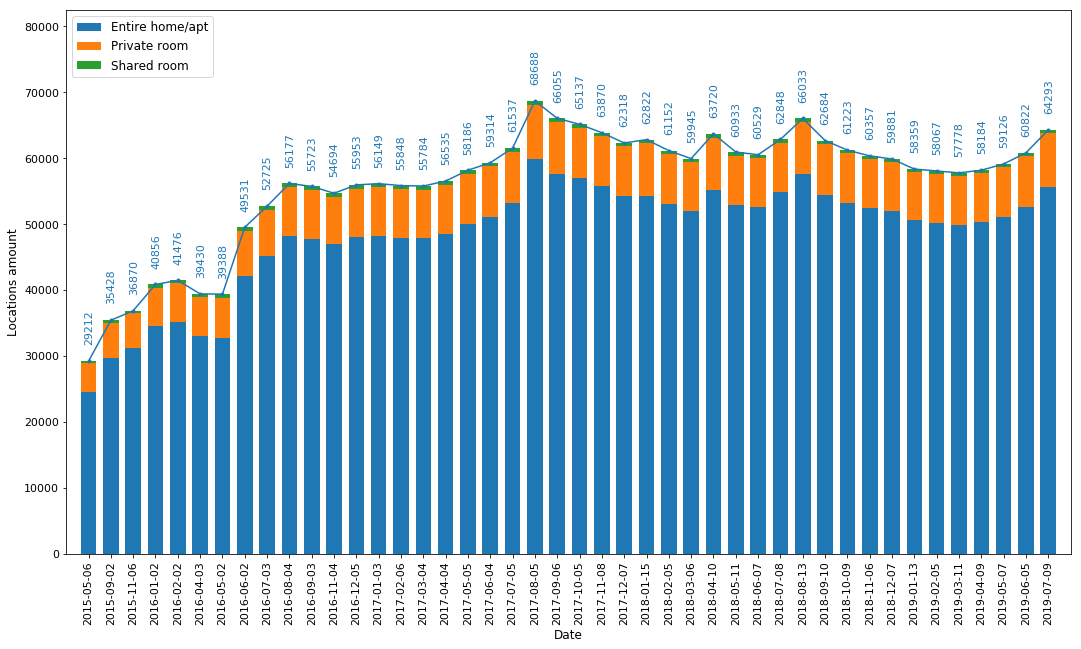

In [36]:
plt.figure(figsize=(18, 10))

plt.plot(locs_amount_history.index, locs_amount_history.amount, marker='.')

rect1 = plt.bar(locs_type_amt_history.index,
                locs_type_amt_history['Entire home/apt'],
                width=0.7)

rect2 = plt.bar(locs_type_amt_history.index,
                locs_type_amt_history['Private room'],
                bottom=locs_type_amt_history['Entire home/apt'],
                width=0.7)

rect3 = plt.bar(locs_type_amt_history.index,
                locs_type_amt_history['Shared room'],
                bottom=locs_type_amt_history['Entire home/apt'] + locs_type_amt_history['Private room'],
                width=0.7)

plt.tick_params(labelsize=11)
plt.tick_params(axis='x', labelrotation=90)
plt.xticks(locs_type_amt_history.index, locs_type_amt_history.date_of_data)
plt.xlabel('Date', size=12)
plt.ylabel('Locations amount', size=12)
plt.xlim(left=-1, right=max(locs_type_amt_history.index)+1)
plt.ylim(bottom=0, top=max(locs_amount_history.amount) * 1.2)
autolabel_simple_lineplot(locs_amount_history, 'amount', '#1f77b4')

plt.legend((rect1[0], rect2[0], rect3[0]),
           ('Entire home/apt', 'Private room', 'Shared room'),
           fontsize=12,
           loc=2)

plt.show()

From May 2015 to July 2019, Airbnb locations' amount increases 102% (64293/29212) in Paris, especially between May 2015 and July 2016, it increases 80% (52725/29212),  most of them are "Entire home/apt". Considering the real estate price in Paris, the "Entire home/apt" might means a studio or a two-room apartment (1 living room + 1 bedroom). Moreover, for recent years, the peaks of locations' amount are in month of April or July / August, which reflects the season.

### Location amount in different neighbourhood (heatmap)

In [37]:
locs_190709 = [[v['latitude'], v['longitude']] for i, v in listing_summary_190709.iterrows()]
locs_190605 = [[v['latitude'], v['longitude']] for i, v in listing_summary_190605.iterrows()]
locs_190507 = [[v['latitude'], v['longitude']] for i, v in listing_summary_190507.iterrows()]
locs_190409 = [[v['latitude'], v['longitude']] for i, v in listing_summary_190409.iterrows()]
locs_190311 = [[v['latitude'], v['longitude']] for i, v in listing_summary_190311.iterrows()]
locs_190205 = [[v['latitude'], v['longitude']] for i, v in listing_summary_190205.iterrows()]
locs_190113 = [[v['latitude'], v['longitude']] for i, v in listing_summary_190113.iterrows()]
print('2019 done.')

locs_181207 = [[v['latitude'], v['longitude']] for i, v in listing_summary_181207.iterrows()]
locs_181106 = [[v['latitude'], v['longitude']] for i, v in listing_summary_181106.iterrows()]
locs_181009 = [[v['latitude'], v['longitude']] for i, v in listing_summary_181009.iterrows()]
locs_180910 = [[v['latitude'], v['longitude']] for i, v in listing_summary_180910.iterrows()]
locs_180813 = [[v['latitude'], v['longitude']] for i, v in listing_summary_180813.iterrows()]
locs_180708 = [[v['latitude'], v['longitude']] for i, v in listing_summary_180708.iterrows()]
locs_180607 = [[v['latitude'], v['longitude']] for i, v in listing_summary_180607.iterrows()]
locs_180511 = [[v['latitude'], v['longitude']] for i, v in listing_summary_180511.iterrows()]
locs_180410 = [[v['latitude'], v['longitude']] for i, v in listing_summary_180410.iterrows()]
locs_180306 = [[v['latitude'], v['longitude']] for i, v in listing_summary_180306.iterrows()]
locs_180205 = [[v['latitude'], v['longitude']] for i, v in listing_summary_180205.iterrows()]
locs_180115 = [[v['latitude'], v['longitude']] for i, v in listing_summary_180115.iterrows()]
print('2018 done.')

locs_171207 = [[v['latitude'], v['longitude']] for i, v in listing_summary_171207.iterrows()]
locs_171108 = [[v['latitude'], v['longitude']] for i, v in listing_summary_171108.iterrows()]
locs_171005 = [[v['latitude'], v['longitude']] for i, v in listing_summary_171005.iterrows()]
locs_170906 = [[v['latitude'], v['longitude']] for i, v in listing_summary_170906.iterrows()]
locs_170805 = [[v['latitude'], v['longitude']] for i, v in listing_summary_170805.iterrows()]
locs_170705 = [[v['latitude'], v['longitude']] for i, v in listing_summary_170705.iterrows()]
locs_170604 = [[v['latitude'], v['longitude']] for i, v in listing_summary_170604.iterrows()]
locs_170505 = [[v['latitude'], v['longitude']] for i, v in listing_summary_170505.iterrows()]
locs_170404 = [[v['latitude'], v['longitude']] for i, v in listing_summary_170404.iterrows()]
locs_170304 = [[v['latitude'], v['longitude']] for i, v in listing_summary_170304.iterrows()]
locs_170206 = [[v['latitude'], v['longitude']] for i, v in listing_summary_170206.iterrows()]
locs_170103 = [[v['latitude'], v['longitude']] for i, v in listing_summary_170103.iterrows()]
print('2017 done.')

locs_161205 = [[v['latitude'], v['longitude']] for i, v in listing_summary_161205.iterrows()]
locs_161104 = [[v['latitude'], v['longitude']] for i, v in listing_summary_161104.iterrows()]
locs_160903 = [[v['latitude'], v['longitude']] for i, v in listing_summary_160903.iterrows()]
locs_160804 = [[v['latitude'], v['longitude']] for i, v in listing_summary_160804.iterrows()]
locs_160703 = [[v['latitude'], v['longitude']] for i, v in listing_summary_160703.iterrows()]
locs_160602 = [[v['latitude'], v['longitude']] for i, v in listing_summary_160602.iterrows()]
locs_160502 = [[v['latitude'], v['longitude']] for i, v in listing_summary_160502.iterrows()]
locs_160403 = [[v['latitude'], v['longitude']] for i, v in listing_summary_160403.iterrows()]
locs_160202 = [[v['latitude'], v['longitude']] for i, v in listing_summary_160202.iterrows()]
locs_160102 = [[v['latitude'], v['longitude']] for i, v in listing_summary_160102.iterrows()]
print('2016 done.')

locs_151106 = [[v['latitude'], v['longitude']] for i, v in listing_summary_151106.iterrows()]
locs_150902 = [[v['latitude'], v['longitude']] for i, v in listing_summary_150902.iterrows()]
locs_150506 = [[v['latitude'], v['longitude']] for i, v in listing_summary_150506.iterrows()]
print('2015 done.')


2019 done.
2018 done.
2017 done.
2016 done.
2015 done.


In [38]:
locs_yearly = []

locs_yearly.append(locs_150506)
locs_yearly.append(locs_150902)
locs_yearly.append(locs_151106)

locs_yearly.append(locs_160102)
locs_yearly.append(locs_160202)
locs_yearly.append(locs_160403)
locs_yearly.append(locs_160502)
locs_yearly.append(locs_160602)
locs_yearly.append(locs_160703)
locs_yearly.append(locs_160804)
locs_yearly.append(locs_160903)
locs_yearly.append(locs_161104)
locs_yearly.append(locs_161205)

locs_yearly.append(locs_170103)
locs_yearly.append(locs_170206)
locs_yearly.append(locs_170304)
locs_yearly.append(locs_170404)
locs_yearly.append(locs_170505)
locs_yearly.append(locs_170604)
locs_yearly.append(locs_170705)
locs_yearly.append(locs_170805)
locs_yearly.append(locs_170906)
locs_yearly.append(locs_171005)
locs_yearly.append(locs_171108)
locs_yearly.append(locs_171207)

locs_yearly.append(locs_180115)
locs_yearly.append(locs_180205)
locs_yearly.append(locs_180306)
locs_yearly.append(locs_180410)
locs_yearly.append(locs_180511)
locs_yearly.append(locs_180607)
locs_yearly.append(locs_180708)
locs_yearly.append(locs_180813)
locs_yearly.append(locs_180910)
locs_yearly.append(locs_181009)
locs_yearly.append(locs_181106)
locs_yearly.append(locs_181207)

locs_yearly.append(locs_190113)
locs_yearly.append(locs_190205)
locs_yearly.append(locs_190311)
locs_yearly.append(locs_190409)
locs_yearly.append(locs_190507)
locs_yearly.append(locs_190605)
locs_yearly.append(locs_190709)


In [39]:
date_index = [d.strftime('%Y-%m-%d') for d in listing_summary_history.date_of_data.unique()][::-1]

In [40]:
locs_history_map = folium.Map(location=[48.856614, 2.3522219], zoom_start = 13, tiles='cartodbpositron')

hm = plugins.HeatMapWithTime(
    locs_yearly,
    index=date_index,
    auto_play=True,
    radius=4,
    max_opacity=0.3
)

hm.add_to(locs_history_map)

In [41]:
# locs_history_map.save('location_history_map.html')

### Location amount in different neighbourhood

In [42]:
nbh_locsNb_history = listing_summary_history.groupby(['date_of_data',
                                                      'neighbourhood'])['id'].nunique().reset_index()
nbh_locsNb_history.rename(columns={'id':'nb'}, inplace=True)
nbh_locsNb_history.sort_values(['neighbourhood', 'date_of_data'], inplace=True)
nbh_locsNb_history.reset_index(drop=True, inplace=True)

In [43]:
nbh_locsNb_history.head()

,date_of_data,neighbourhood,nb
0,2015-05-06,Batignolles-Monceau,2082
1,2015-09-02,Batignolles-Monceau,2539
2,2015-11-06,Batignolles-Monceau,2625
3,2016-01-02,Batignolles-Monceau,2886
4,2016-02-02,Batignolles-Monceau,2937


In [44]:
nbh_geo_sorted_190709 = nbh_geo_190709.sort_values('neighbourhood').reset_index(drop=True)

In [45]:
datetime_index = pd.DatetimeIndex(nbh_locsNb_history.date_of_data.unique())

dt_index_epochs = datetime_index.astype(int) // 10**9
dt_index = np.array(dt_index_epochs).astype('U10')

In [46]:
styledata = {}

s = 0
e = 44
for i, v in nbh_geo_sorted_190709.iterrows():
    df = pd.DataFrame(
        {'color': np.array(nbh_locsNb_history.nb[s:e]),
         'opacity': np.array([1] * 44)},
#          'neighbourhood': np.array(nbh_locsNb_history.neighbourhood[s:e])},
#          'opacity': np.array(nbh_locsNb_history.nb[s:e])},
        index=dt_index
    )
    styledata[i] = df
    s += 44
    e += 44


In [47]:
nbh_geo_190709.head()

,neighbourhood,neighbourhood_group,geometry
0,Batignolles-Monceau,None,"(POLYGON ((2.295167 48.873955, 2.29504 48.8737..."
1,Palais-Bourbon,None,"(POLYGON ((2.320903 48.863057, 2.320941 48.863..."
2,Buttes-Chaumont,None,"(POLYGON ((2.389429 48.901218, 2.390136 48.901..."
3,Opéra,None,"(POLYGON ((2.339777 48.882029, 2.339816 48.882..."
4,Entrepôt,None,"(POLYGON ((2.364686 48.884369, 2.364855 48.884..."


In [48]:
max_color = max(nbh_locsNb_history['nb'])
min_color = min(nbh_locsNb_history['nb'])
max_opacity, min_opacity = 1, 1

In [49]:
from branca.colormap import linear

cmap = linear.OrRd_09.scale(min_color, max_color)


def norm(x):
    return (x - x.min()) / (x.max() - x.min())

for i, data in styledata.items():
    data['color'] = data['color'].map(cmap)
    data['opacity'] = 1

In [50]:
cmap

In [51]:
styledict = {
    str(nbh): data.to_dict(orient='index') for nbh, data in styledata.items()
}

In [52]:
from folium.plugins import TimeSliderChoropleth

nbh_count_colormap_history = folium.Map(location=[48.856614, 2.3522219], zoom_start = 12, tiles='cartodbpositron')

TimeSliderChoropleth(
    nbh_geo_sorted_190709.to_json(),
    styledict=styledict
).add_to(nbh_count_colormap_history)

nbh_count_colormap_history

In [ ]:
# nbh_count_colormap_history.save('nbh_count_colormap_history.html')

From May 2015 to July 2019, Airbnb locations' amount increases a lot in Paris. However, for locations' amount in terms of neighbourhood, it keeps coherence, which means the locations at Buttes-Montmartre are always more than other neighbourhoods. Locations at Popincourt increases 212%, which is much more than other neighbourhoods.

In [67]:
pd.pivot_table(data=listing_summary_history,
               index='date_of_data',
               columns='neighbourhood',
               values='id',
               aggfunc='count',
               fill_value=0)

neighbourhood,Batignolles-Monceau,Bourse,Buttes-Chaumont,Buttes-Montmartre,Entrepôt,Gobelins,Hôtel-de-Ville,Louvre,Luxembourg,Ménilmontant,Observatoire,Opéra,Palais-Bourbon,Panthéon,Passy,Popincourt,Reuilly,Temple,Vaugirard,Élysée
date_of_data,,,,,,,,,,,,,,,,,,,,
2015-05-06,2082,1088,1497,3299,1838,871,940,669,1230,1508,1382,1277,844,1385,1816,2024,1272,980,2269,941
2015-09-02,2539,1205,1893,4100,2185,1162,1140,703,1393,1806,1650,1561,1146,1591,2239,2671,1436,1207,2697,1104
2015-11-06,2625,1254,1932,4308,2273,1224,1205,707,1462,1842,1653,1793,1201,1583,2292,2851,1404,1364,2786,1111
2016-01-02,2886,1351,2111,4687,2518,1357,1433,802,1644,1988,1832,1963,1348,1753,2456,3222,1589,1559,3057,1300
2016-02-02,2937,1354,2151,4737,2572,1370,1463,802,1640,2042,1837,2044,1353,1738,2505,3309,1641,1571,3086,1324
2016-04-03,2825,1283,2067,4509,2447,1285,1392,776,1556,1910,1772,1945,1247,1619,2384,3181,1537,1507,2888,1300
2016-05-02,2799,1262,2070,4495,2463,1289,1397,776,1511,1917,1772,1945,1226,1608,2414,3169,1627,1498,2841,1309
2016-06-02,3517,1522,2605,5586,3196,1761,1707,1003,1665,2662,2120,2190,1447,1849,3131,4312,2309,1927,3649,1373
2016-07-03,3603,1603,2772,6025,3466,1940,1820,1108,1847,2852,2138,2335,1610,1977,3074,4883,2230,2097,3878,1467


TODO:
- TS: (need data for each year)
    * location amount in different neighbourhood (map)
    * location price in different neighbourhood (map)